<a href="https://colab.research.google.com/github/abijbart/DS4H_covid19/blob/master/exploration_ds4h.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [0]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# **Load Files**

## Will have to git clone everytime the VM starts

In [0]:
!git clone https://github.com/abijbart/DS4H_covid19.git
dataset_dir = 'DS4H_covid19/dataset/'

Cloning into 'DS4H_covid19'...
remote: Enumerating objects: 102, done.
remote: Counting objects: 100% (102/102), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 102 (delta 12), reused 93 (delta 8), pack-reused 0
Receiving objects: 100% (102/102), 7.42 MiB | 4.99 MiB/s, done.
Resolving deltas: 100% (12/12), done.


# **Hospital Beds**
We have hospital bed data for:
*   Italy
*   Korea
*   Switzerland
*   USA
*   India
*   Indonesia


We will need to remove Brazil from our list of countries to model 

ALSO: let's work with 2016 hospital bed data since that is most recent for USA and the other countries have 2016 data

In [105]:
hospital_beds = pd.read_csv(dataset_dir + 'OECD_hospitalbeds.csv')
hospital_beds = hospital_beds[hospital_beds['TIME'] == 2016] 
hospital_beds = hospital_beds[['LOCATION', 'Value']] # Value is number of hospital beds PER 1000 HABITANTS
hospital_beds = hospital_beds.set_index('LOCATION')
hospital_beds

,Value
LOCATION,
Italy,3.17
Korea,11.98
Switzerland,4.55
USA,2.77
India,0.48
Indonesia,0.99


Text(0.5, 0, 'Country')

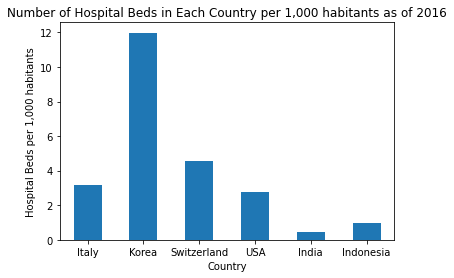

In [106]:
ax = hospital_beds.plot.bar(rot = 0, legend = False)
ax.set_title('Number of Hospital Beds in Each Country per 1,000 habitants as of 2016')
ax.set_ylabel('Hospital Beds per 1,000 habitants')
ax.set_xlabel('Country')

# **Novel Coronavirus Dataset Exploration**

In [0]:
main_df = pd.read_csv(dataset_dir + 'novel-corona-virus-2019-dataset/covid_19_data.csv')
main_df = main_df[
    (main_df['Country/Region'] == 'India') 
    | (main_df['Country/Region'] == 'South Korea') 
    | (main_df['Country/Region'] == 'Italy')
    | (main_df['Country/Region'] == 'US')
    | (main_df['Country/Region'] == 'Switzerland')
    | (main_df['Country/Region'] == 'Indonesia') ]

main_df['ObservationDate'] = pd.to_datetime(main_df['ObservationDate'])
main_df['Last Update'] = pd.to_datetime(main_df['Last Update'])

main_india = main_df[(main_df['Country/Region'] == 'India')] # 69 observation days
main_korea = main_df[(main_df['Country/Region'] == 'South Korea')] # 77 observation days
main_italy = main_df[(main_df['Country/Region'] == 'Italy')] # 68 observation days
main_switzerland = main_df[(main_df['Country/Region'] == 'Switzerland')] # 43 observation days
main_indonesia = main_df[(main_df['Country/Region'] == 'Indonesia')] # 37 observation days

## US SHOULD BE HANDLED DIFFERENTLY BECAUSE OF STATES
## WILL LIKELY COMBINE AT STATE LEVEL
## TODO
main_usa = main_df[(main_df['Country/Region'] == 'US')] # 

In [0]:
main_usa_sum = pd.DataFrame(columns=['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'])
dates = []
for date in main_usa['ObservationDate'].unique():
  dates.append(date)
  temp_usa = main_usa[main_usa['ObservationDate'] == date].copy()
  main_usa_sum = main_usa_sum.append(pd.DataFrame(temp_usa.sum(axis=0, numeric_only = True)).T)
main_usa_sum['ObservationDate'] = dates

In [0]:
main_usa_sum = main_usa_sum.reset_index()
for i in range(len(main_usa_sum)):
  main_usa_sum.at[i, 'Province/State'] = 'All'
  main_usa_sum.at[i, 'Country/Region'] = 'USA'

In [110]:
main_usa_sum

,index,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,0,32.0,2020-01-22,All,USA,NaN,1.0,0.0,0.0
1,0,70.0,2020-01-23,All,USA,NaN,1.0,0.0,0.0
2,0,237.0,2020-01-24,All,USA,NaN,2.0,0.0,0.0
3,0,319.0,2020-01-25,All,USA,NaN,2.0,0.0,0.0
4,0,818.0,2020-01-26,All,USA,NaN,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
72,0,669814.0,2020-04-03,All,USA,NaN,275586.0,7087.0,9707.0
73,0,688132.0,2020-04-04,All,USA,NaN,308850.0,8407.0,14652.0
74,0,706588.0,2020-04-05,All,USA,NaN,337072.0,9619.0,17448.0
75,0,725148.0,2020-04-06,All,USA,NaN,366667.0,10783.0,19581.0


ObservationDate is equal to number of rows


In [111]:
print(len(main_india) if len(main_india) == len(main_india['ObservationDate'].unique()) else "UNEQUAL")
print(len(main_korea) if (len(main_korea) == len(main_korea['ObservationDate'].unique())) else "UNEQUAL")
print(len(main_italy) if (len(main_italy) == len(main_italy['ObservationDate'].unique())) else "UNEQUAL")
print(len(main_switzerland) if (len(main_switzerland) == len(main_switzerland['ObservationDate'].unique())) else "UNEQUAL")
print(len(main_indonesia) if (len(main_indonesia) == len(main_indonesia['ObservationDate'].unique())) else "UNEQUAL")
print(len(main_usa_sum) if (len(main_usa_sum) == len(main_usa_sum['ObservationDate'].unique())) else "UNEQUAL")

69
77
68
43
37
77


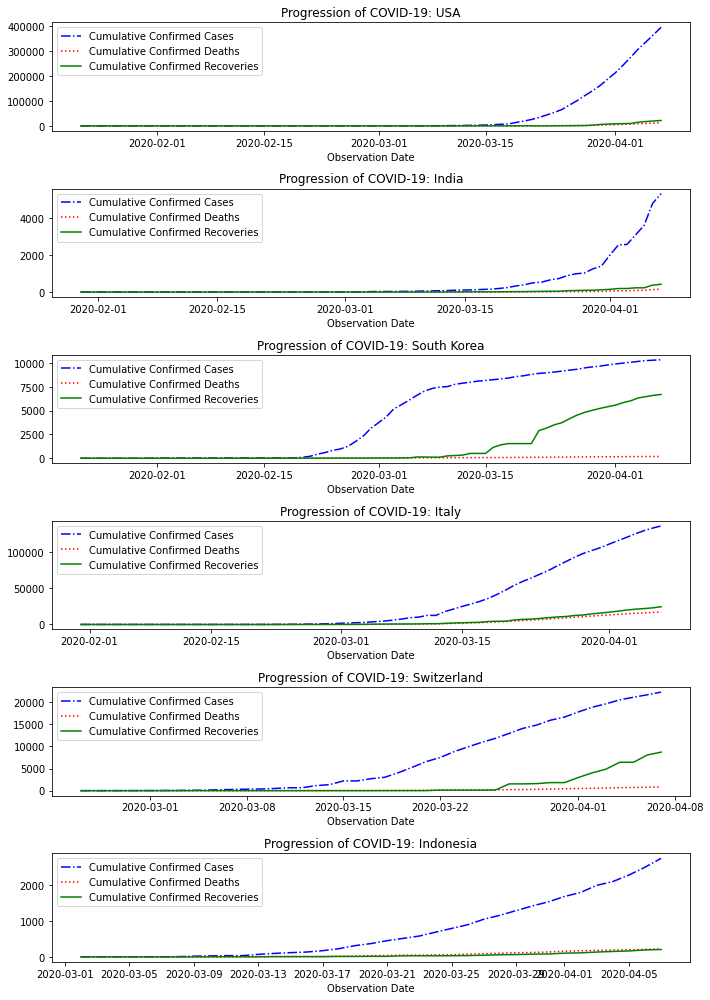

In [112]:
main_countries = [main_usa_sum, main_india, main_korea, main_italy, main_switzerland, main_indonesia]

ROWS = len(main_countries)
COLS = 1
fig, axes = plt.subplots(nrows=ROWS, ncols=COLS, figsize=(10, 14))

r = 0
c = 0
count = 0

for country in main_countries:
  x = country['ObservationDate']
  y_confirmed = country['Confirmed']
  y_deaths = country['Deaths']
  y_recovered = country['Recovered']

  axes[r,].set_title('Progression of COVID-19: ' + country.iloc[0]['Country/Region'])
  axes[r,].set_xlabel('Observation Date')
  axes[r,].plot(x, y_confirmed, c= 'b', ls = '-.', label = 'Cumulative Confirmed Cases')
  axes[r,].plot(x, y_deaths, c= 'r', ls = ':', label = 'Cumulative Confirmed Deaths')
  axes[r,].plot(x, y_recovered, c= 'g', ls = '-', label = 'Cumulative Confirmed Recoveries')
  axes[r,].legend()

  count += 1
  r = count
  

fig.tight_layout()
plt.show()

In [113]:
# last day of collection was 4/7/20
deaths_vs_recovered = []
deaths_vs_confirmed = []
recovered_vs_confirmed = []
total_deaths = []
total_confirmed = []
total_recovered = []
countries = []
for country in main_countries:
  country = country.sort_values(by='ObservationDate')
  print(country.iloc[-1]['Country/Region'] + "\t" 
        + str(country.iloc[-1]['ObservationDate']))
  countries.append(country.iloc[-1]['Country/Region'])

  deaths_vs_recovered.append(country.iloc[-1]['Deaths'] 
                             / country.iloc[-1]['Recovered'])
  deaths_vs_confirmed.append(country.iloc[-1]['Deaths'] 
                             / country.iloc[-1]['Confirmed'])
  recovered_vs_confirmed.append(country.iloc[-1]['Recovered'] 
                                / country.iloc[-1]['Confirmed'])
  total_deaths.append(country.iloc[-1]['Deaths'])
  total_confirmed.append(country.iloc[-1]['Confirmed'])
  total_recovered.append(country.iloc[-1]['Recovered'])

ratios = pd.DataFrame()
ratios['Country'] = countries
ratios['Deaths to Recoverd Ratio'] = deaths_vs_recovered
ratios['Deaths to Confrimed Ratio'] = deaths_vs_confirmed
ratios['Recovered to Confirmed Ratio'] = recovered_vs_confirmed
ratios['Total Deaths'] = total_deaths

USA	2020-04-07 00:00:00
India	2020-04-07 00:00:00
South Korea	2020-04-07 00:00:00
Italy	2020-04-07 00:00:00
Switzerland	2020-04-07 00:00:00
Indonesia	2020-04-07 00:00:00


In [114]:
ratios

,Country,Deaths to Recoverd Ratio,Deaths to Confrimed Ratio,Recovered to Confirmed Ratio,Total Deaths
0,USA,0.584570,0.032108,0.054926,12722.0
1,India,0.356295,0.028243,0.079269,150.0
2,South Korea,0.028682,0.018585,0.647953,192.0
3,Italy,0.702156,0.126318,0.179901,17127.0
4,Switzerland,0.094324,0.036894,0.391138,821.0
5,Indonesia,1.083333,0.080716,0.074507,221.0


In [0]:
newIndex = ['USA', 'India', 'Korea', 'Italy', 'Switzerland', 'Indonesia']
hospital_beds = hospital_beds.reindex(newIndex)
hospital_beds['Total'] = hospital_beds['Value'] * 1000
totalbeds =  hospital_beds['Total'].tolist()

totals = pd.DataFrame()
totals['Country'] = countries
totals['Confirmed'] = total_confirmed
totals['Recovered'] = total_recovered
totals['Deaths'] = total_deaths
totals['Beds'] = totalbeds

In [116]:
totals

,Country,Confirmed,Recovered,Deaths,Beds
0,USA,396223.0,21763.0,12722.0,2770.0
1,India,5311.0,421.0,150.0,480.0
2,South Korea,10331.0,6694.0,192.0,11980.0
3,Italy,135586.0,24392.0,17127.0,3170.0
4,Switzerland,22253.0,8704.0,821.0,4550.0
5,Indonesia,2738.0,204.0,221.0,990.0


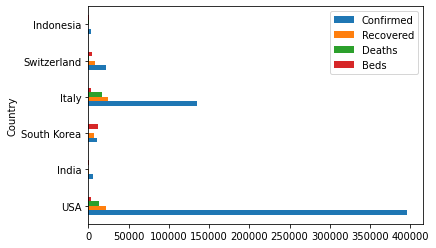

In [117]:
totals.plot.barh(x = 'Country')

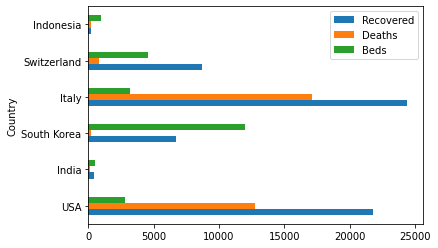

In [118]:
totals.drop(columns='Confirmed').plot.barh(x = 'Country')

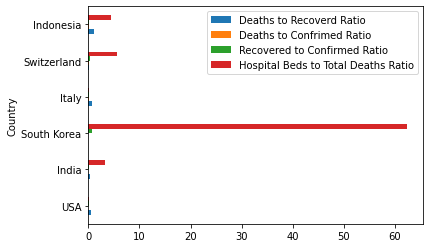

In [119]:
ratios['Total Hospital Beds'] = totalbeds
ratios['Hospital Beds to Total Deaths Ratio'] = ratios['Total Hospital Beds'] / ratios['Total Deaths']
ratios = ratios.drop(columns=['Total Deaths', 'Total Hospital Beds'])
ratios.plot.barh(x = 'Country')


In [120]:
smaller_ratios = ratios.drop(columns=['Total Deaths', 'Total Hospital Beds'])
axes[0, 1] = smaller_ratios.plot.barh(x = 'Country')

KeyError: ignored

# **COVID-19 in Italy Dataset Exploration**

In [0]:
# Provincial dataset 
prov_df = pd.read_csv(dataset_dir + 'covid19-in-italy/covid19_italy_province.csv')
prov_df['Date'] = pd.to_datetime(prov_df['Date']) 
# Date ranges from 2/24/20 to 4/7/20
print('Data starts on: ' + str(prov_df['Date'].min()))
print('Data ends on: ' + str(prov_df['Date'].max()))
total_days = len(prov_df['Date'].unique())
print('For a total of ' + str(total_days) + ' days')
print('Do all provinces have data for the same ' + str(total_days) + ' days?')
print(all([total_days == len(prov_df[(prov_df['ProvinceName'] == providence)]['Date'].unique()) for province in prov_df['ProvinceName'].unique()]))
print(prov_df.columns)

Data starts on: 2020-02-24 18:00:00
Data ends on: 2020-04-07 17:00:00
For a total of 44 days
Do all provinces have data for the same 44 days?
True
Index(['SNo', 'Date', 'Country', 'RegionCode', 'RegionName', 'ProvinceCode',
       'ProvinceName', 'ProvinceAbbreviation', 'Latitude', 'Longitude',
       'TotalPositiveCases'],
      dtype='object')


All provinces have data from the same 44 day span. 

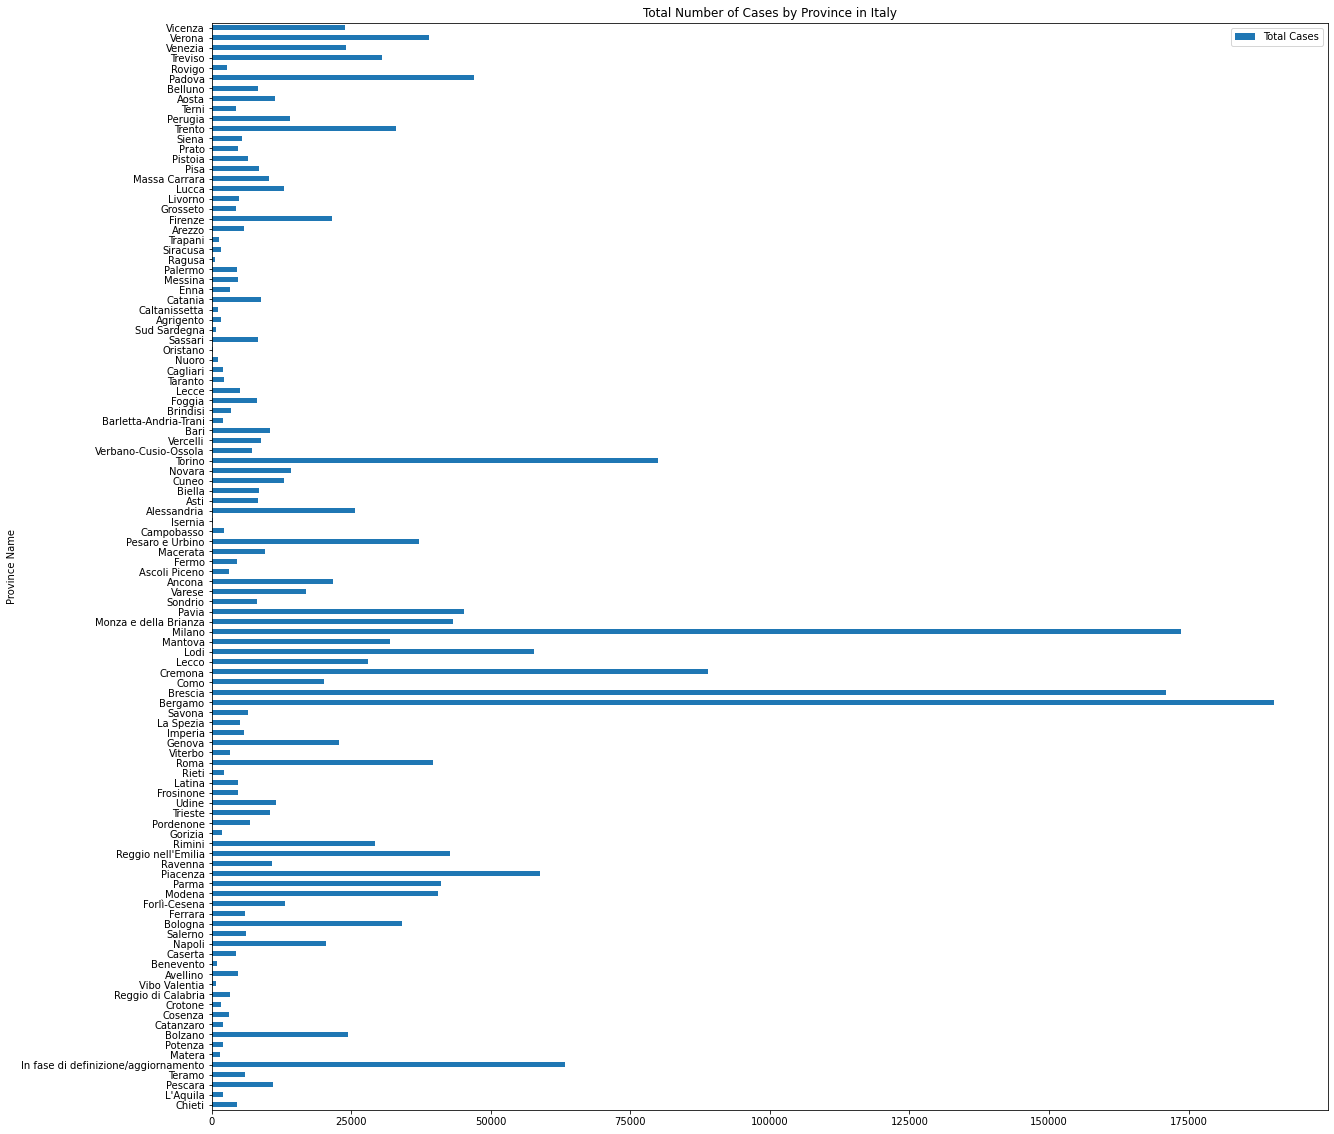

In [0]:
# Sum up number of cases across the 44 Days by province
cases_by_prov = []
for province in prov_df['ProvinceName'].unique():
  cases = prov_df[prov_df['ProvinceName']==province]['TotalPositiveCases'].sum()
  cases_by_prov.append(cases)

cbp = pd.DataFrame()
cbp['Province Name'] = prov_df['ProvinceName'].unique()
cbp['Total Cases'] = cases_by_prov
cbp.plot.barh(x = 'Province Name', y = 'Total Cases', figsize=(20,20), title='Total Number of Cases by Province in Italy')

In [0]:
# Regional dataset
region_df = pd.read_csv(dataset_dir + 'covid19-in-italy/covid19_italy_region.csv')
region_df['Date'] = pd.to_datetime(region_df['Date']) 
dates = region_df['Date'].unique()
total_days = len(dates)
print('Days with data: ' + str(total_days))
print(region_df.dtypes)

Days with data: 44
SNo                                   int64
Date                         datetime64[ns]
Country                              object
RegionCode                            int64
RegionName                           object
Latitude                            float64
Longitude                           float64
HospitalizedPatients                  int64
IntensiveCarePatients                 int64
TotalHospitalizedPatients             int64
HomeConfinement                       int64
CurrentPositiveCases                  int64
NewPositiveCases                      int64
Recovered                             int64
Deaths                                int64
TotalPositiveCases                    int64
TestsPerformed                        int64
dtype: object


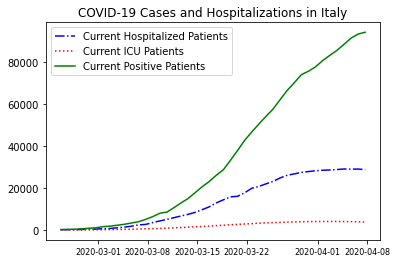

In [0]:
hosp = []
icu = []
pos = []
for d in dates: 
  hosp.append(region_df[region_df['Date'] == d]['HospitalizedPatients'].sum())
  icu.append(region_df[region_df['Date'] == d]['IntensiveCarePatients'].sum())
  pos.append(region_df[region_df['Date'] == d]['CurrentPositiveCases'].sum())
plt.plot(dates, hosp, c= 'b', ls = '-.', label = 'Current Hospitalized Patients')
plt.plot(dates, icu, c= 'r', ls= ':', label = 'Current ICU Patients')
plt.plot(dates, pos, c = 'g', ls='-', label= 'Current Positive Patients')
plt.tick_params(axis='x', which='major', labelsize=8)
plt.title('COVID-19 Cases and Hospitalizations in Italy')
plt.legend()
plt.show()

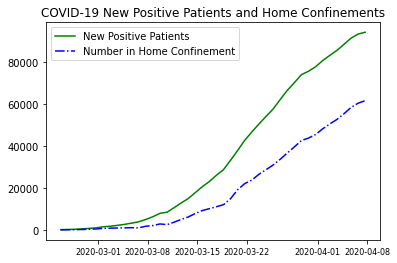

In [0]:
iso = [] # people in home confinement 
new_pos = []
for d in dates:
  iso.append(region_df[region_df['Date'] == d]['HomeConfinement'].sum())
  new_pos.append(region_df[region_df['Date'] == d]['NewPositiveCases'].sum())
plt.plot(dates, pos, c = 'g', ls='-', label= 'New Positive Patients')
plt.plot(dates, iso, c= 'b', ls = '-.', label = 'Number in Home Confinement')
plt.tick_params(axis='x', which='major', labelsize=8)
plt.legend()
plt.title('COVID-19 New Positive Patients and Home Confinements')
plt.show()

# **COVID-19 in India Dataset Exploration**

In [0]:
india_df = pd.read_csv(dataset_dir + 'covid19-in-india/covid_19_india.csv')
india_df['Date'] = pd.to_datetime(india_df['Date'])
india_df.dtypes

Sno                                  int64
Date                        datetime64[ns]
Time                                object
State/UnionTerritory                object
ConfirmedIndianNational             object
ConfirmedForeignNational            object
Cured                                int64
Deaths                               int64
Confirmed                            int64
dtype: object

Data spans 70 days
Do all provinces have data for the same 70 days?
False


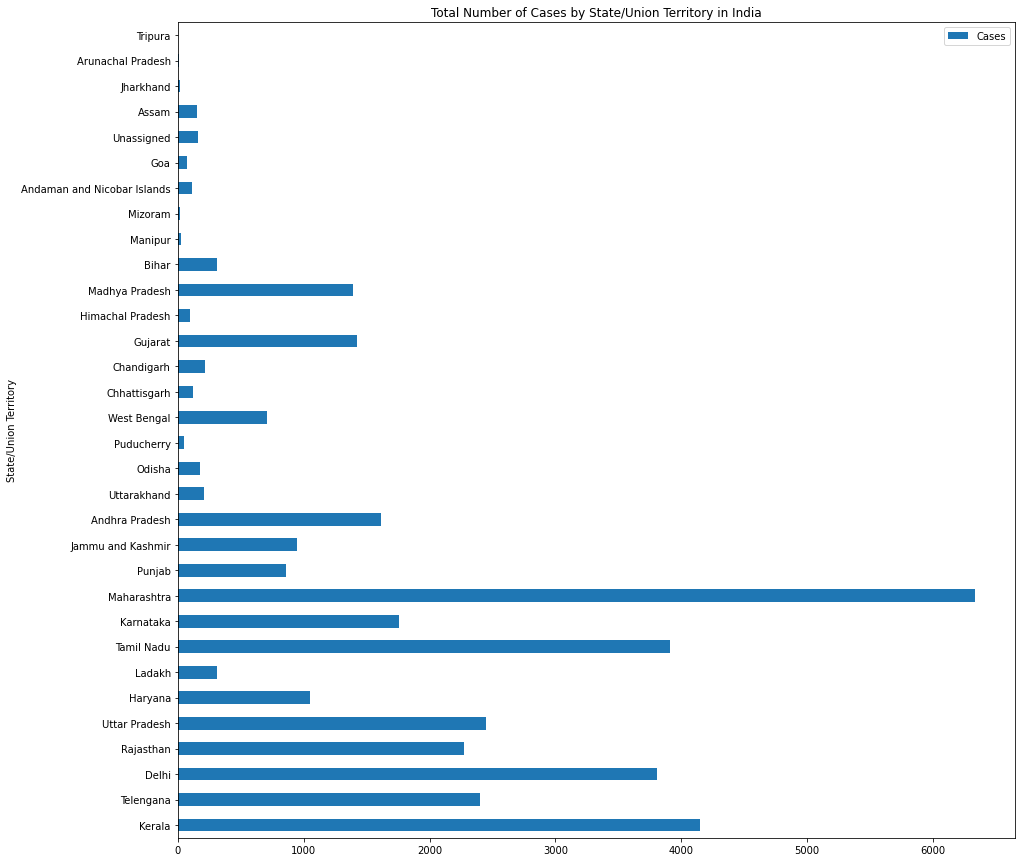

In [0]:
states = india_df['State/UnionTerritory'].unique()
dates = india_df['Date'].unique()
print('Data spans ' + str(len(dates)) + ' days')
print('Do all provinces have data for the same ' + str(len(dates)) + ' days?')
print(all([len(dates) == len(india_df[(india_df['State/UnionTerritory'] == state)]['Date'].unique()) for state in india_df['State/UnionTerritory'].unique()]))
state_cases = []
state_deaths = []

for s in states: 
  state_cases.append(india_df[india_df['State/UnionTerritory'] == s]['Confirmed'].sum())
  state_deaths.append(india_df[india_df['State/UnionTerritory'] == s]['Deaths'].sum())

cases_by_state = pd.DataFrame()
cases_by_state['Cases'] = state_cases
cases_by_state['Deaths'] = state_deaths
cases_by_state['State/Union Territory'] = states
cases_by_state.plot.barh(x = 'State/Union Territory', y = 'Cases', figsize=(15,15), title='Total Number of Cases by State/Union Territory in India')

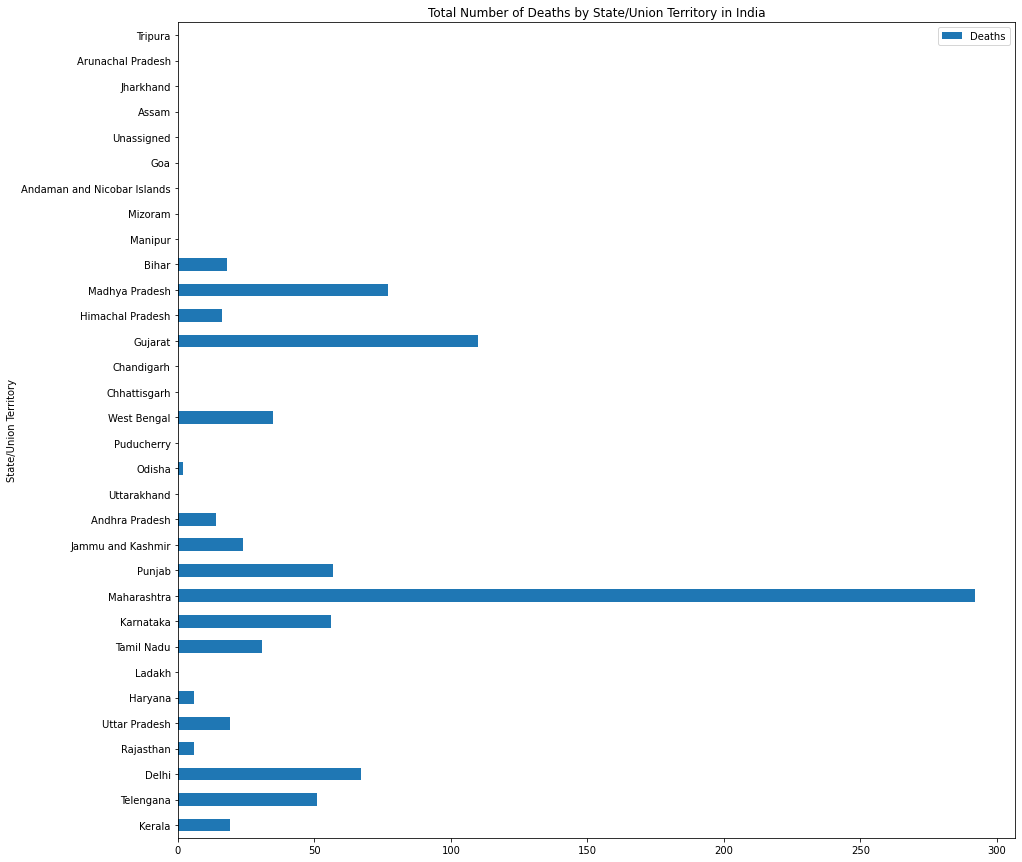

In [0]:
cases_by_state.plot.barh(x = 'State/Union Territory', y = 'Deaths', figsize=(15,15), title='Total Number of Deaths by State/Union Territory in India')

# **COVID-19 in South Korea Dataset Exploration**

In [0]:
sk_df_patient = pd.read_csv(dataset_dir + 'coronavirusdataset_korea/PatientInfo.csv')
sk_df_patient = sk_df_patient.loc[:, ['confirmed_date', 'released_date', 'deceased_date', 'state']]
sk_df_patient.head()

,confirmed_date,released_date,deceased_date,state
0,2020-01-23,2020-02-05,NaN,released
1,2020-01-30,2020-03-02,NaN,released
2,2020-01-30,2020-02-19,NaN,released
3,2020-01-30,2020-02-15,NaN,released
4,2020-01-31,2020-02-24,NaN,released


In [0]:
sk_df_testing = pd.read_csv(dataset_dir + 'coronavirusdataset_korea/Time.csv')
sk_df_testing = sk_df_testing.loc[:, ['date', 'test', 'confirme']]

Index(['date', 'time', 'test', 'negative', 'confirmed', 'released',
       'deceased'],
      dtype='object')

smaller_ratio

In [0]:
from google.colab import files
uploaded = files.upload()

Saving COVID19_open_line_list.csv to COVID19_open_line_list.csv


In [0]:
import io
covid_data = pd.read_csv(io.BytesIO(uploaded['COVID19_open_line_list.csv']))

In [0]:
covid_data['date_admission_hospital'] = pd.to_datetime(covid_data['date_admission_hospital'], errors='coerce', format='%d.%m.%Y')
covid_data['date_confirmation'] = pd.to_datetime(covid_data['date_confirmation'], errors='coerce', format='%d.%m.%Y')
covid_data['date_onset_symptoms'] = pd.to_datetime(covid_data['date_onset_symptoms'], errors='coerce', format='%d.%m.%Y')
covid_data['date_death_or_discharge'] = pd.to_datetime(covid_data['date_death_or_discharge'], errors='coerce', format='%d.%m.%Y')
covid_data.dtypes

ID                                 float64
age                                 object
sex                                 object
city                                object
province                            object
country                             object
wuhan(0)_not_wuhan(1)              float64
latitude                           float64
longitude                          float64
geo_resolution                      object
date_onset_symptoms         datetime64[ns]
date_admission_hospital     datetime64[ns]
date_confirmation           datetime64[ns]
symptoms                            object
lives_in_Wuhan                      object
travel_history_dates                object
travel_history_location             object
reported_market_exposure            object
additional_information              object
chronic_disease_binary             float64
chronic_disease                     object
source                              object
sequence_available                  object
outcome    

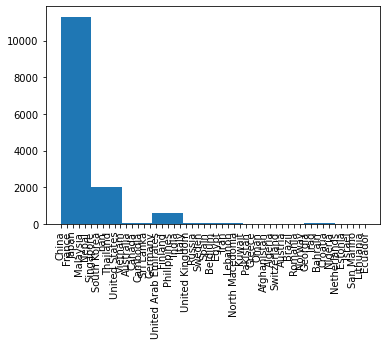

In [0]:
covid_data['country'].head(20)
plt.hist(covid_data.country.astype(str))
plt.xticks(rotation='vertical')
plt.show()


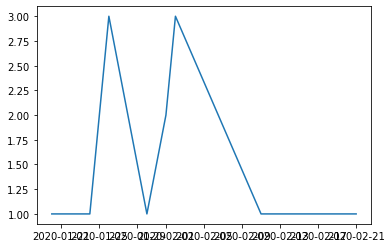

In [0]:
from matplotlib import pyplot as plt
covid_data['country'].unique()

us_admit_dates = covid_data[covid_data['country'] == 'United States']['date_admission_hospital'].unique()
us_admit_dates.sort()
admissions = []
for d in us_admit_dates:
  us = covid_data[covid_data['country'] == 'United States']
  daily_admit = len(us[us['date_admission_hospital'] == d])
  admissions.append(daily_admit)
admissions
plt.plot(us_admit_dates, admissions)
plt.show()